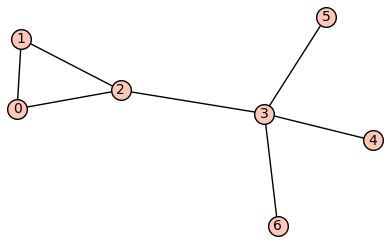

In [27]:
g = Graph()
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(1,2)
g.add_edge(3,2)
g.add_edge(5,3)
g.add_edge(6,3)
g.add_edge(3,4)
g.plot()
g.show()

def notRadomDico(G): 
    dico = {}
    for v in G.vertices():
        dico[v] = 1
    return dico

noC = notRadomDico(g)


487.0


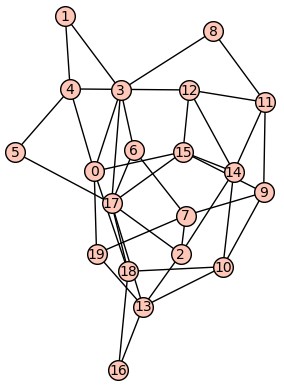

In [23]:
import random
G = graphs.RandomGNP(20,0.2)
G.plot()

def RandomDico(G):
    dico = {}
    for v in G.vertices():
        dico[v] = random.randint(0, 100)
    return dico

c=RandomDico(G)

def CS_PLNE(G, c):
    p = MixedIntegerLinearProgram(maximization=False)
    vars = p.new_variable(integer=True, nonnegative=True)
    
    p.set_objective(p.sum(vars[v] * c[v] for v in G.vertices()))
    
    for u, v in G.edges(labels=False):
        p.add_constraint(vars[u] + vars[v] >= 1)
    
    opt = p.solve()
    
    print(opt) #afficher la valeur optimale du PL et les valeurs des variables
    solution = [v for v in G.vertices() if p.get_values(vars[v]) >= 0.5]
    return solution

CS_PLNE(G, c)

G.show()

In [24]:
def CS_arrondiPL(G, c):
    p = MixedIntegerLinearProgram(maximization=False)
    vars = p.new_variable(nonnegative=True) 
    p.set_objective(p.sum(vars[v] * c[v] for v in G.vertices()))

    for u, v in G.edges(labels=False):
        p.add_constraint(vars[u] + vars[v] >= 1)

    opt = p.solve()

    solution = [v for v in G.vertices() if p.get_values(vars[v]) >= 0.5]

    print("Valeur optimale (relaxation):", opt)
    print("Valeurs arrondies des variables:", {v: p.get_values(vars[v]) for v in G.vertices()})
    return solution

CS_arrondiPL(G, c)

Valeur optimale (relaxation): 478.0
Valeurs arrondies des variables: {0: 0.5, 1: 0.5, 2: 0.5, 3: 1.0, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.5, 8: 0.0, 9: 0.5, 10: 0.5, 11: 1.0, 12: 0.5, 13: 0.5, 14: 0.5, 15: 0.5, 16: 0.5, 17: 0.5, 18: 0.5, 19: 0.5}


[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
CS_arrondiPL(g, noC)